In [1]:
import matplotlib.pyplot as plt
import numpy as np
import utilities as u

from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D
from pathlib import Path

plt.style.use('seaborn-colorblind')

In [2]:
model_dir0 = "DataAugmented"
model_dir1 = "SuperResolution"

model_dir = [model_dir0, model_dir1]

# Define the range of the time series
var = "Hs"

# Define the point where the time series is extracted (in pixel)
xi = [69, 86, 69]
yi = [94, 104, 77] 


# Define length of extraction points for easier acess
n = len(xi)

# Save the figure?
save = True

xlabel = r"$H_S$ [m]"

Wave height threshold: 3.713470697402954
Model 0 R$^2$=0.974
bias=-0.009
RMSE=0.021
NRMSE=0.0054
Wave height threshold: 3.9961752891540527
Model 0 R$^2$=0.993
bias=-0.033
RMSE=0.042
NRMSE=0.0091
Wave height threshold: 3.9660050868988037
Model 0 R$^2$=0.992
bias=-0.041
RMSE=0.065
NRMSE=0.0134
Wave height threshold: 3.713470697402954
Model 1 R$^2$=0.227
bias=-0.045
RMSE=0.115
NRMSE=0.0294
Wave height threshold: 3.9961752891540527
Model 1 R$^2$=0.991
bias=0.015
RMSE=0.046
NRMSE=0.0099
Wave height threshold: 3.9660050868988037
Model 1 R$^2$=0.988
bias=0.000
RMSE=0.080
NRMSE=0.0167


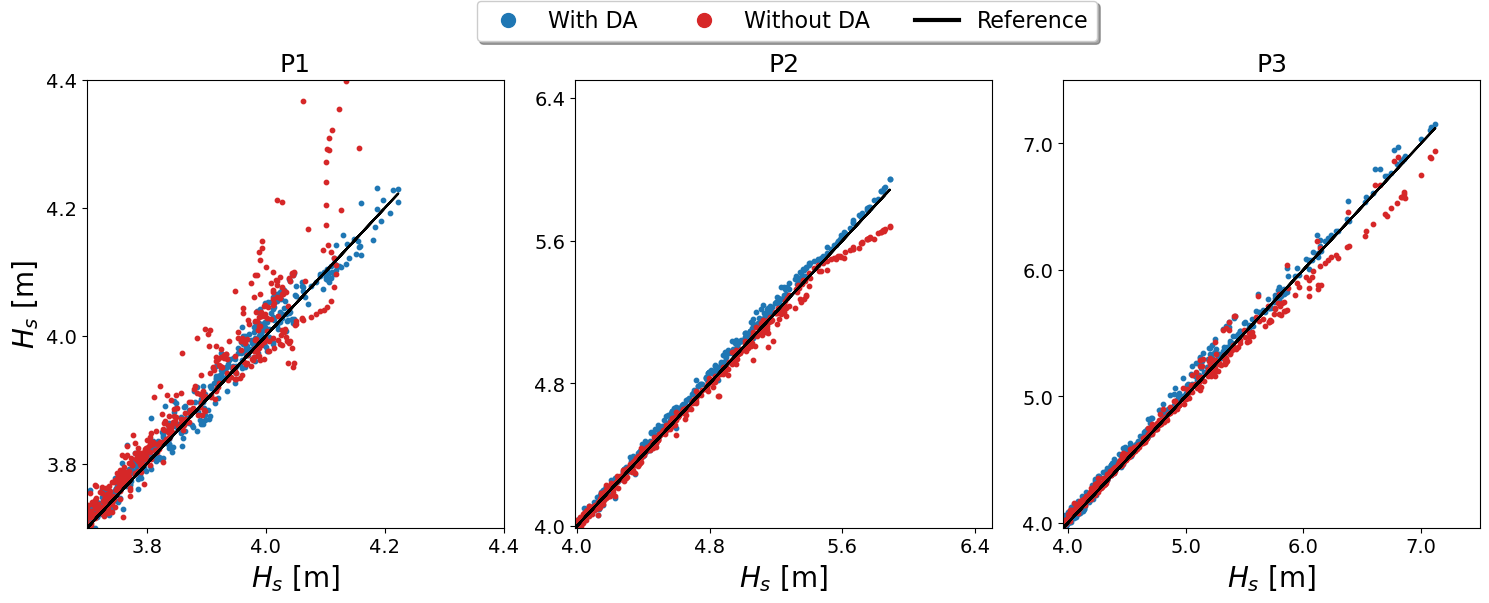

In [3]:
# Determine max- and minval for each column to determine axis limits
min_val = np.infty
max_val = -np.infty

LABELSIZE = 20
TICKLABELSIZE = 14
LEGENDFONTSIZE = 16
TITLESIZE = 18
TEXTSIZE = 11

label1 = "Model Prediction"
label2 = "LR Input"
label3 = "HR Ground Truth"
labels = [label1, label2, label3]

# Set min- and maxval that correspond to 5% heighest waves
min_vals = [3.7, 3.99, 3.96]
max_vals = [4.4, 6.5, 7.5]

fig, axs = plt.subplots(1, 3, figsize=(15,6))

for nmodel, model in enumerate(model_dir):
    for npoint in range(n):
        # Load saved array, if calculation was already done before
        path_dir = Path(f"Data/Time_Series/{model}")
        fpath = path_dir / f"Var_{var}_posxy_{xi[npoint]}_{yi[npoint]}.npy"
        
        arr = np.load(fpath)
        prediction = arr[0, :]
        hr = arr[1, :]

        # Do the statistics for the 5% largest wave heights
        threshold = np.percentile(hr, 95)
        condition = hr > threshold
        
        print("Wave height threshold:", threshold)
        
        # Compute various statistics
        HR_mean = np.nanmean(hr[condition])
        pred_mean = np.nanmean(prediction[condition])

        # Bias
        bias = np.nanmean(hr[condition] - prediction[condition])
        # RMSE 
        rmse = np.sqrt(np.nanmean((hr[condition] - prediction[condition])**2))
        # SI
        nrmse = rmse/HR_mean
        # R^2 Coefficient of determination
        SSres = np.nansum((hr[condition] - prediction[condition])**2)
        SStot = np.nansum((hr[condition] - HR_mean)**2)
        Rsq = 1 - SSres/SStot

        text = "\n".join([fr"R$^2$={Rsq:.3f}",
                          f"bias={bias:.3f}",
                          f"RMSE={rmse:.3f}",
                          f"NRMSE={nrmse:.4f}"]) 
        
        print(f"Model {nmodel}", text)
        

        if nmodel == 0:
            color = "tab:blue"
        else:
            color = "tab:red"

        line1 = axs[npoint].scatter(hr, prediction, s=10, label=label1,
                                    color=color, zorder=2)
        line2, = axs[npoint].plot(hr, hr, '-k', linewidth=1.5, label=label3)

        # axs[0].set_title(xlabel[nvar] + units[nvar], fontsize=TITLESIZE)
        axs[npoint].tick_params(axis='both', labelsize=TICKLABELSIZE)

        axs[0].set_ylabel(r"$H_s$ [m]", size=LABELSIZE)
        axs[npoint].set_xlabel(r"$H_s$ [m]", size=LABELSIZE)
        
        axs[npoint].set_title(f"P{npoint+1}", size=TITLESIZE)

        min_val, max_val = min_vals[npoint], max_vals[npoint]
        # Maximum 5 ticks, set at nice locations
        locations = MaxNLocator(4).tick_values(min_val, max_val)
        # Set same ticklabels for both x- and y-axis
        axs[npoint].set_xticks(locations)
        axs[npoint].set_xticklabels(locations)
        axs[npoint].set_yticks(locations)
        axs[npoint].set_yticklabels(locations)
        axs[npoint].set_xlim(min_val, max_val)
        axs[npoint].set_ylim(min_val, max_val)
        
        axs[npoint].xaxis.set_major_formatter('{x:.1f}')
        axs[npoint].yaxis.set_major_formatter('{x:.1f}')


legend_elements = [Line2D([0], [0], marker='o', color='tab:blue',
                          markersize=10, label='With DA', linestyle=""),
                   Line2D([0], [0], marker='o', color='tab:red',
                          markersize=10, label='Without DA', linestyle=""),
                   Line2D([0], [0], color='black', label='Reference', lw=3)]


fig.legend(handles=legend_elements, loc=(0.32, 0.93),
           fancybox=True, shadow=True, ncol=3, fontsize=LEGENDFONTSIZE)

plt.tight_layout()

fig.subplots_adjust(top=0.88)

# Output folder and file name
fdir = Path("Plots")
fname = f"PredVsRef_{var}_Mod_{model_dir1}.png"

if save:
    if not fdir.exists():
        fdir.mkdir()
    plt.savefig(fdir / fname)
                         
plt.show()